# 질문
### sigmoid와 tanh

In [3]:
# Importing Module
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Setting Dataset

In [4]:
# data hyper-parameter
img_size = 256
batch_size = 32

In [5]:
# Data Normalization
# [-1, 1] 범위로 조정
def custom_normalize(image):
  image = image / 255.0
  image = 2 * image - 1
  return image

# ImageDataGenerator() : 이미지 증강과 변환을 위한 클래스 - augmentation도 가능
train_datagen = ImageDataGenerator(rescale=None,
                                   preprocessing_function=custom_normalize,
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=None,
                                       preprocessing_function=custom_normalize)

train_generator = train_datagen.flow_from_directory(
    'dataset/train_001',
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'dataset/train_001',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test_001',
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='binary'
)

Found 8968 images belonging to 2 classes.
Found 2242 images belonging to 2 classes.
Found 2732 images belonging to 2 classes.


# Selective Search_1
#### Selective Search의 목적은 객체가 있을 것으로 예상되는 후보 영역을 반환하는 것으로,
#### two-stage 방식의 detection 모델이 효과적으로 객체 detecting을 하기 위한 영역을 미리 제시하는 모델
#### ss.process()의 결과로 반환되는 값들은 객체가 있을 것으로 예상되는 후보 영역에 해당
#### Selective Search는 객체가 있을 것으로 예상되는 후보 영역을 반환하는 것에 불과 (어떤 가치 판단 없음)
#### (해당 후보 영역을 모델 prediction 할 경우 결과 값은, 이진 분류 모델의 경우 어떤 클래스에 해당하는가를 나타냄)

In [10]:
# selective search
path_img = 'dataset/test_001/angry/im595.png'
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()  ## selective search initialize
image = cv2.imread(path_img)  # path_img의 image를 불러와서 image 변수에 저장
ss.setBaseImage(image)    # seletive search를 할 이미지 설정
ss.switchToSelectiveSearchFast()    # selectivesearch의 품질을 조절하기 위한 메서드 - 빠른 지역 제안 생성을 유도
ssresults = ss.process()    # selective search segmentation 진행 후 후보영역의 사각형 좌표 반환

## Selective Search의 목적은 객체가 있을 것으로 예상되는 후보 영역을 반환하는 것으로,
## two-stage 방식의 detection 모델이 효과적으로 객체 detecting을 하기 위한 영역을 미리 제시하는 모델
## ss.process()의 결과로 반환되는 값들은 객체가 있을 것으로 예상되는 후보 영역에 해당
## Selective Search는 객체가 있을 것으로 예상되는 후보 영역을 반환하는 것에 불과 (어떤 가치 판단 없음)

In [11]:
# 반환된 후보영역의 사각형 좌표
ssresults , len(ssresults)

(array([[ 0, 25, 11, 23],
        [ 0, 22, 11, 26],
        [36,  0, 12, 48],
        [ 0,  0, 44, 44],
        [ 7, 28, 35, 20],
        [ 0, 25, 42, 23],
        [13, 27, 25, 21],
        [ 8, 29, 31, 19],
        [ 8, 33, 34, 15],
        [ 0,  0, 21, 48],
        [ 0, 21, 11, 27],
        [12,  0, 33, 39],
        [15, 12, 18, 15],
        [ 0,  0, 44, 45],
        [ 0,  0, 20, 48],
        [12,  0, 32, 39],
        [ 0, 22, 39, 26],
        [ 0,  0, 48, 48],
        [15, 28, 27, 20],
        [30,  0, 18, 48],
        [29,  0, 19, 48],
        [12,  0, 32, 48],
        [ 0,  0, 44, 48],
        [ 0, 22, 42, 26],
        [12,  0, 36, 48],
        [12,  0, 33, 48]], dtype=int32),
 26)

In [12]:
image

array([[[214, 214, 214],
        [212, 212, 212],
        [218, 218, 218],
        ...,
        [ 28,  28,  28],
        [ 28,  28,  28],
        [ 28,  28,  28]],

       [[209, 209, 209],
        [207, 207, 207],
        [214, 214, 214],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[204, 204, 204],
        [201, 201, 201],
        [208, 208, 208],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       ...,

       [[ 41,  41,  41],
        [127, 127, 127],
        [125, 125, 125],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 15,  15,  15]],

       [[ 43,  43,  43],
        [158, 158, 158],
        [144, 144, 144],
        ...,
        [ 17,  17,  17],
        [ 11,  11,  11],
        [ 15,  15,  15]],

       [[ 50,  50,  50],
        [145, 145, 145],
        [129, 129, 129],
        ...,
        [116, 116, 116],
        [ 65,  65,  65],
        [ 18,  18,  18]]

[ 0 25 11 23]
[ 0 22 11 26]
[36  0 12 48]
[ 0  0 44 44]
[ 7 28 35 20]
[ 0 25 42 23]
[13 27 25 21]
[ 8 29 31 19]
[ 8 33 34 15]
[ 0  0 21 48]
[ 0 21 11 27]
[12  0 33 39]
[15 12 18 15]
[ 0  0 44 45]
[ 0  0 20 48]
[12  0 32 39]
[ 0 22 39 26]
[ 0  0 48 48]
[15 28 27 20]
[30  0 18 48]
[29  0 19 48]
[12  0 32 48]
[ 0  0 44 48]
[ 0 22 42 26]
[12  0 36 48]
[12  0 33 48]


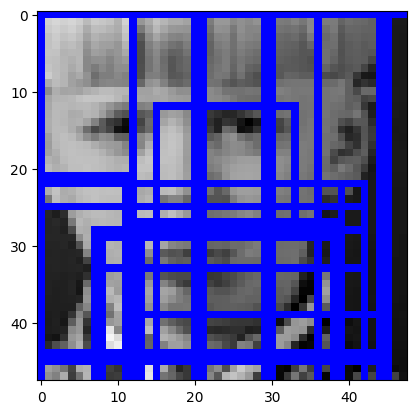

In [13]:
#cv2.rectangle
for box in ssresults:
    print(box)
    x,y,w,h = box
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 1)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [57]:
# 예시로 업로드한 이미지를 토대로 selective search를 활용하여 후보 영역을 추출하고,
# 후보 영역에서의 이미지를 뽑아서 전처리 실행 후 정답이 맞는지 확인하는 task 수행

import numpy as np

image = cv2.imread(path_img)
cropped_image = []
## ss 제안 받은 영역 crop
for box in ssresults:   #ssresults에는 후보영역 box들이 있음
    x,y,w,h = box
    crop = image[y:y+h, x:x+w]
    cropped_image.append(crop)  # cropped_image에는  box로 crop된 이미지가 있음

# crop 한 영역의 전처리
preprocessed_image = []
for img in cropped_image:
  resized_image = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_AREA)
  normalized_image = custom_normalize(resized_image)
  preprocessed_image.append(normalized_image)

preprocessed_image = np.array(preprocessed_image)
print(len(cropped_image))
print(preprocessed_image.shape)

26
(26, 256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

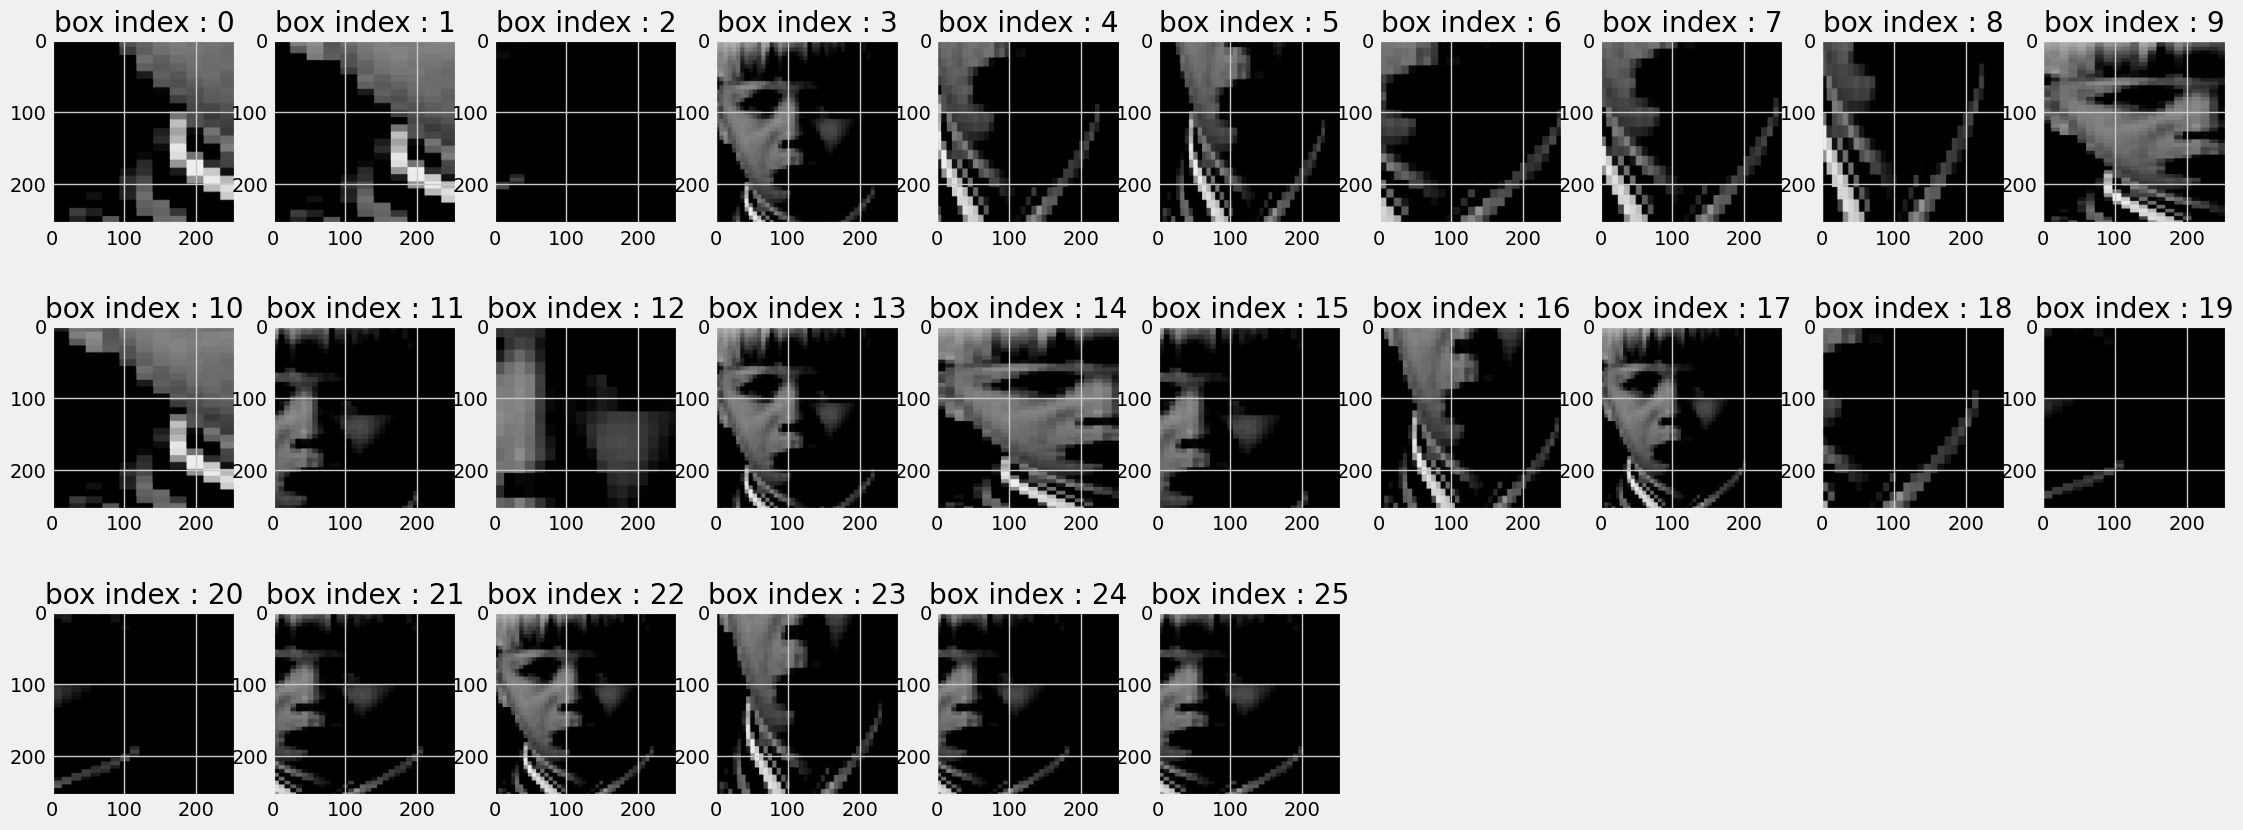

In [60]:
# show data for examples
def show_images(image, num_images):
    plt.figure(figsize=(25, 10))
    for i in range(num_images):
        plt.subplot(num_images//10 + 1, 10, i+1)
        plt.title(f"box index : {i}")
        plt.imshow(image[i])
    plt.show()
show_images(preprocessed_image, preprocessed_image.shape[0])

위 그래프의 결과 중첩되는 box가 상당히 많음을 알 수 있음 - NMS

### Build Basic Model

#### Using Sigmoid activation

In [16]:
# Importing Model : EfficientNet

base_model = tf.keras.applications.EfficientNetB0(include_top=False,
                                                  weights='imagenet', input_shape=(img_size, img_size, 3))
# Freeze the Layers from EfficientNet

for layer in base_model.layers:
  layer.trainable = False
# base_model.summary()

# Connecting Dense Layer with EfficientNet
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation = 'relu')(x)
output_layer = Dense(1, activation = 'sigmoid')(x)
our_efficient_model = Model(inputs = base_model.input, outputs = output_layer)
# our_efficient_model.summary()

# Criterion : sigmoid 0~1 , prediction >0.8 = >1, prediction < 0.3  =>0 ,

2024-02-15 16:20:33.554099: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 16:20:33.564788: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 16:20:33.566643: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [19]:
# Model Compiling
our_efficient_model.compile(optimizer='adam',
                            loss='binary_crossentropy', metrics=['Accuracy'])
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=7)

In [20]:
# Model Fit : show graph the differences
history_1 = our_efficient_model.fit(train_generator, validation_data=validation_generator, epochs=50, callbacks=es)

Epoch 1/50
281/281 [==============================] - 19s 51ms/step - loss: 0.6539 - Accuracy: 0.6422 - val_loss: 0.6522 - val_Accuracy: 0.6436
Epoch 2/50
281/281 [==============================] - 13s 46ms/step - loss: 0.6531 - Accuracy: 0.6436 - val_loss: 0.6511 - val_Accuracy: 0.6436
Epoch 3/50
281/281 [==============================] - 13s 46ms/step - loss: 0.6530 - Accuracy: 0.6436 - val_loss: 0.6511 - val_Accuracy: 0.6436
Epoch 4/50
281/281 [==============================] - 13s 46ms/step - loss: 0.6524 - Accuracy: 0.6436 - val_loss: 0.6511 - val_Accuracy: 0.6436
Epoch 5/50
281/281 [==============================] - 13s 46ms/step - loss: 0.6537 - Accuracy: 0.6436 - val_loss: 0.6520 - val_Accuracy: 0.6436
Epoch 6/50
281/281 [==============================] - 13s 46ms/step - loss: 0.6527 - Accuracy: 0.6436 - val_loss: 0.6518 - val_Accuracy: 0.6436
Epoch 7/50
281/281 [==============================] - 13s 46ms/step - loss: 0.6528 - Accuracy: 0.6436 - val_loss: 0.6516 - val_Accuracy:

#### Visualize training and validation loss and accuracy

In [21]:
history_1.history

{'loss': [0.6538755893707275,
  0.6531445384025574,
  0.6529592275619507,
  0.6523871421813965,
  0.6537227630615234,
  0.6527043581008911,
  0.6527865529060364,
  0.6529240608215332,
  0.6520137786865234,
  0.6521317362785339,
  0.6519103050231934,
  0.6524661183357239,
  0.652217447757721,
  0.6519791483879089,
  0.6516737341880798,
  0.651483416557312,
  0.6518941521644592,
  0.6520722508430481,
  0.651885449886322,
  0.6512948870658875,
  0.6514756083488464,
  0.6519229412078857,
  0.6513410806655884,
  0.6516269445419312],
 'Accuracy': [0.6421721577644348,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427253723,
  0.6436217427

#### Using Tanh activation

In [25]:
# Importing Model : EfficientNet

base_model_t = tf.keras.applications.EfficientNetB0(include_top=False,
                                                  weights='imagenet', input_shape=(img_size, img_size, 3))
# Freeze the Layers from EfficientNet

for layer in base_model_t.layers:
  layer.trainable = False
# base_model.summary()

# Connecting Dense Layer with EfficientNet
x_t = base_model_t.output
x_t = GlobalAveragePooling2D()(x_t)
x_t = Dense(32, activation = 'relu')(x_t)
output_layer_t = Dense(1, activation = 'tanh')(x_t)
our_efficient_model_t = Model(inputs = base_model_t.input, outputs = output_layer_t)
# our_efficient_model.summary()

# Criterion : sigmoid 0~1 , prediction >0.8 = >1, prediction < 0.3  =>0 ,

In [26]:
# Model Compiling
our_efficient_model_t.compile(optimizer='adam',
                            loss='binary_crossentropy', metrics=['Accuracy'])

In [27]:
# Model Fit : show graph the differences
history_2 = our_efficient_model_t.fit(train_generator, validation_data=validation_generator, epochs=50, callbacks=es)

Epoch 1/50
281/281 [==============================] - 28s 79ms/step - loss: 0.7170 - Accuracy: 0.6320 - val_loss: 0.6545 - val_Accuracy: 0.6436
Epoch 2/50
281/281 [==============================] - 13s 46ms/step - loss: 0.6567 - Accuracy: 0.6434 - val_loss: 0.6506 - val_Accuracy: 0.6436
Epoch 3/50
281/281 [==============================] - 13s 46ms/step - loss: 0.6568 - Accuracy: 0.6424 - val_loss: 0.6639 - val_Accuracy: 0.6436
Epoch 4/50
281/281 [==============================] - 13s 46ms/step - loss: 0.6576 - Accuracy: 0.6412 - val_loss: 0.6661 - val_Accuracy: 0.6454
Epoch 5/50
281/281 [==============================] - 13s 46ms/step - loss: 0.6573 - Accuracy: 0.6399 - val_loss: 0.6510 - val_Accuracy: 0.6436
Epoch 6/50
281/281 [==============================] - 13s 46ms/step - loss: 0.6585 - Accuracy: 0.6418 - val_loss: 0.6580 - val_Accuracy: 0.6436
Epoch 7/50
281/281 [==============================] - 13s 46ms/step - loss: 0.6539 - Accuracy: 0.6441 - val_loss: 0.6511 - val_Accuracy:

In [28]:
history_2.history

{'loss': [0.7169594168663025,
  0.6567049622535706,
  0.6567860841751099,
  0.6576131582260132,
  0.6573366522789001,
  0.6584978699684143,
  0.6539192199707031,
  0.6618648767471313,
  0.6534128785133362,
  0.6577187180519104,
  0.6548714637756348,
  0.6548963785171509,
  0.6545187830924988,
  0.654606819152832,
  0.652991533279419,
  0.6536270380020142],
 'Accuracy': [0.6320250034332275,
  0.6433987617492676,
  0.6423951983451843,
  0.6411685943603516,
  0.6399419903755188,
  0.6418376564979553,
  0.6440678238868713,
  0.638046383857727,
  0.6432872414588928,
  0.6402765512466431,
  0.6435102820396423,
  0.6436217427253723,
  0.6432872414588928,
  0.6437332630157471,
  0.6436217427253723,
  0.6440678238868713],
 'val_loss': [0.6544589996337891,
  0.6506251692771912,
  0.6639049053192139,
  0.6660693287849426,
  0.6509634256362915,
  0.6580170392990112,
  0.6510865092277527,
  0.6668557524681091,
  0.6498624682426453,
  0.6556939482688904,
  0.6500137448310852,
  0.6565802097320557,
 

#### Visualization to Compare Consequences between Sigmoid and Tanh activation function on last layer

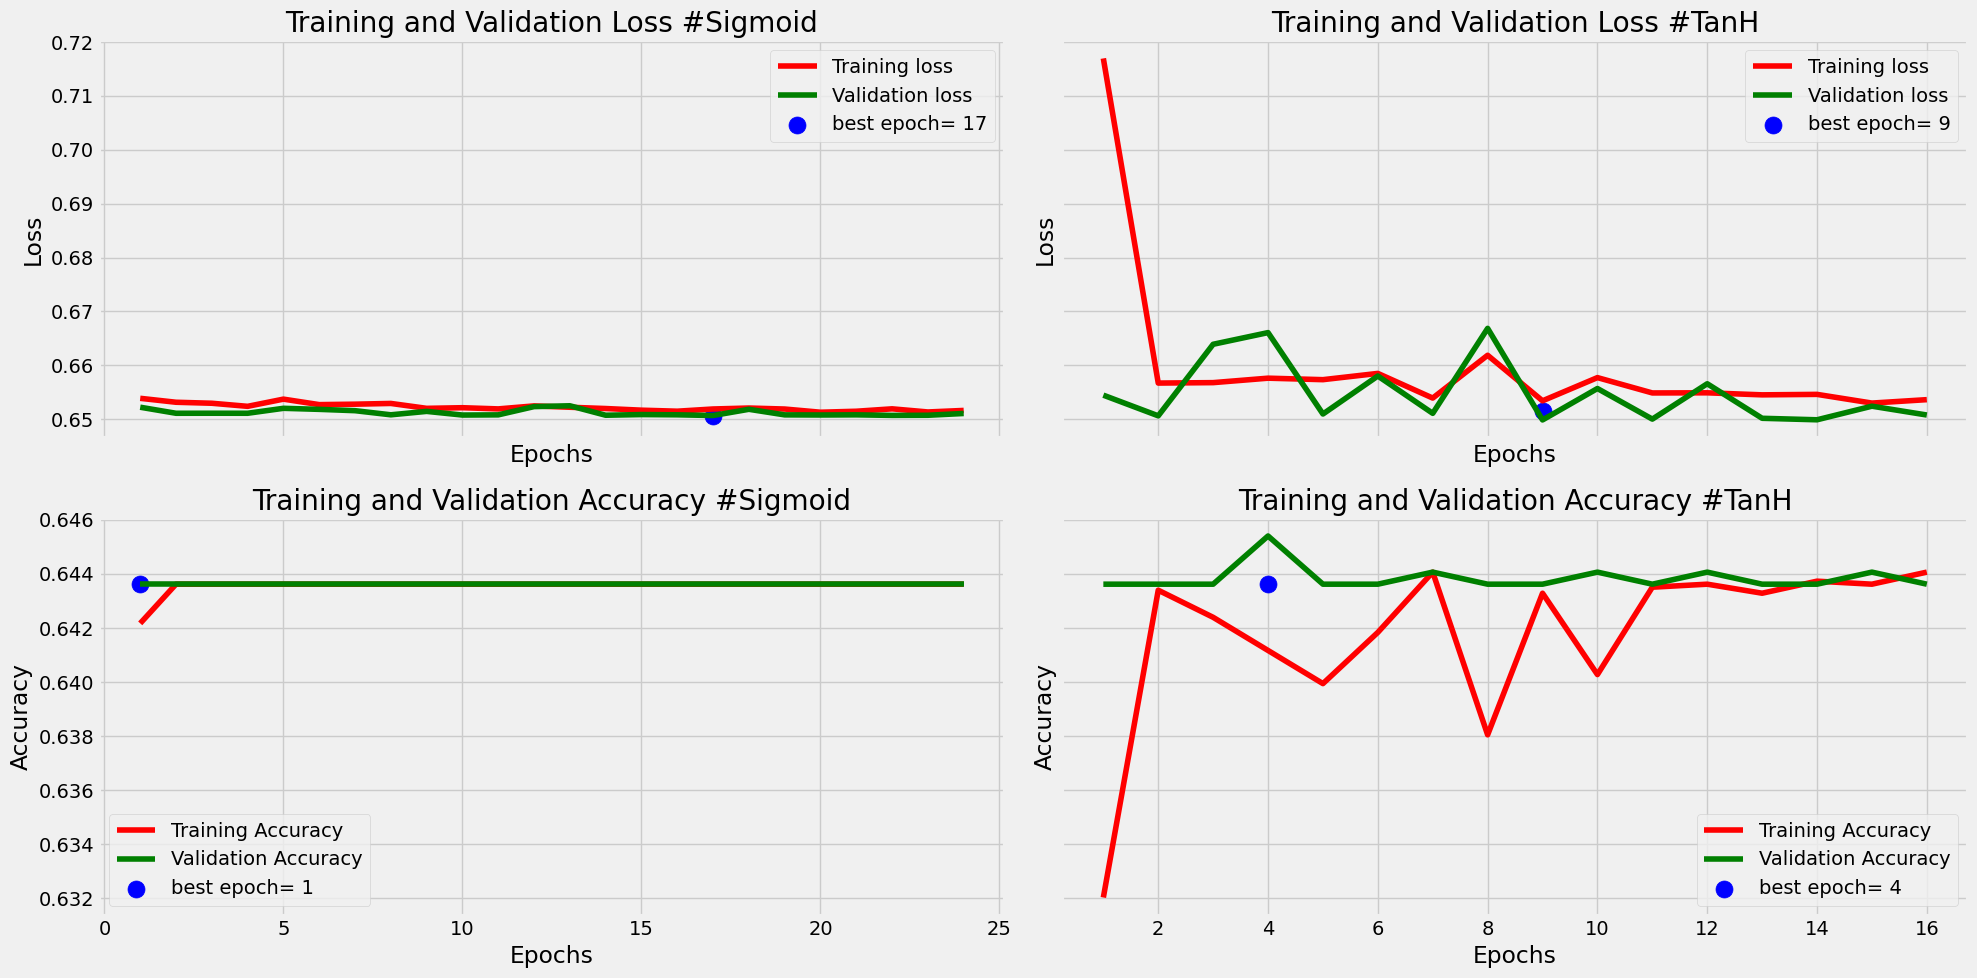

In [55]:
# Sigmoid
train_acc_1 = history_1.history['Accuracy']
train_loss_1 = history_1.history['loss']
valid_acc_1 = history_1.history['val_Accuracy']
valid_loss_1 = history_1.history['val_loss']
# TanH
train_acc_2 = history_2.history['Accuracy']
train_loss_2 = history_2.history['loss']
valid_acc_2 = history_2.history['val_Accuracy']
valid_loss_2 = history_2.history['val_loss']

# loss 최저점과 acc 최고점 좌표 확인 목적
# Sigmoid
index_loss_1 = np.argmin(valid_loss_1)
val_lowest_1 = valid_loss_1[index_loss_1]
index_acc_1 = np.argmax(valid_acc_1)
acc_highest_1 = valid_acc_1[index_acc_1]
# TanH
index_loss_2 = np.argmin(valid_loss_2)
val_lowest_2 = valid_loss_1[index_loss_2]
index_acc_2 = np.argmax(valid_acc_2)
acc_highest_2 = valid_acc_1[index_acc_2]

# Epochs을 그래프 상에서 표현하기 위함
# Sigmoid
Epochs_1 = [i+1 for i in range(len(train_acc_1))]
loss_label_1 = f'best epoch= {str(index_loss_1 + 1)}'
acc_label_1 = f'best epoch= {str(index_acc_1 + 1)}'
# TanH
Epochs_2 = [i+1 for i in range(len(train_acc_2))]
loss_label_2 = f'best epoch= {str(index_loss_2 + 1)}'
acc_label_2 = f'best epoch= {str(index_acc_2 + 1)}'

# Plot
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(20, 10))
### Sigmoid
axs[0, 0].plot(Epochs_1, train_loss_1, 'r', label= 'Training loss')
axs[0, 0].plot(Epochs_1, valid_loss_1, 'g', label= 'Validation loss')
axs[0, 0].scatter(index_loss_1 + 1, val_lowest_1, s= 150, c= 'blue', label= loss_label_1)
axs[0, 0].set_title('Training and Validation Loss #Sigmoid')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

axs[1, 0].plot(Epochs_1, train_acc_1, 'r', label= 'Training Accuracy')
axs[1, 0].plot(Epochs_1, valid_acc_1, 'g', label= 'Validation Accuracy')
axs[1, 0].scatter(index_acc_1 + 1 , acc_highest_1, s= 150, c= 'blue', label= acc_label_1)
axs[1, 0].set_title('Training and Validation Accuracy #Sigmoid')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

## TanH
axs[0, 1].plot(Epochs_2, train_loss_2, 'r', label= 'Training loss')
axs[0, 1].plot(Epochs_2, valid_loss_2, 'g', label= 'Validation loss')
axs[0, 1].scatter(index_loss_2 + 1, val_lowest_2, s= 150, c= 'blue', label= loss_label_2)
axs[0, 1].set_title('Training and Validation Loss #TanH')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

axs[1, 1].plot(Epochs_2, train_acc_2, 'r', label= 'Training Accuracy')
axs[1, 1].plot(Epochs_2, valid_acc_2, 'g', label= 'Validation Accuracy')
axs[1, 1].scatter(index_acc_2 + 1 , acc_highest_2, s= 150, c= 'blue', label= acc_label_2)
axs[1, 1].set_title('Training and Validation Accuracy #TanH')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()
plt.tight_layout()
plt.show()

Q. Loss function의 변화율이 크다는 것의 의미는? - 이동 편향을 상대적으로 극복하여 local minimum에서 벗어날 수 있는 여지가 있음을 상징하는지?
Q. Accuracy에서의 변화율이 크다는 것의 의미는? - 역전파의 이동 편향이 극복되는 과정에서 발생하는 현상?

### NMS (Non-Maximum Suppression)
#### Object Detection Model이 예측한 다수의 box 중에서 중복된 박스를 제거하는 기술
#### 예측된 박스들을 prediction 점수에 따라 정렬하고, threshold 값을 초과하는 박스만 남기는 기술
#### 객체 검출에 있어 더 높은 신뢰도 값을 갖는 bounding box를 추출하는 역할
#### selective search는 객체의 후보 영역을 생성하는 기술이라는 점에서 역할이 다른 기술

In [61]:
scores = our_efficient_model.predict(preprocessed_image)
# 0.0 이상이면 1, 0.0 미만이면 0 클래스로 (0 : angry, 1 : happy)
# 각각 클래스에 대한 좌표값과 예측결과 값을 같이 표시
# 0번 클래스 : [preprocessed_image[0] 좌표값, 1 - 0.2]
# 1번 클래스 : [preprocessed_image[1] 좌표값, 0.7]

1/1 [==============================] - 1s 1s/step


In [62]:
print(scores.shape) #: 예측한 결과값들이 나열
# q. 예측한 결과값의 의미는?

(26, 1)


In [63]:
print(scores)

[[0.6566472 ]
 [0.65680397]
 [0.6576989 ]
 [0.6574392 ]
 [0.65500396]
 [0.65305424]
 [0.6561351 ]
 [0.6556346 ]
 [0.65417033]
 [0.6575417 ]
 [0.6569074 ]
 [0.6589814 ]
 [0.65942925]
 [0.65711606]
 [0.6575423 ]
 [0.65872145]
 [0.65433496]
 [0.6564489 ]
 [0.6556227 ]
 [0.6575835 ]
 [0.6576068 ]
 [0.6567259 ]
 [0.65644234]
 [0.6539169 ]
 [0.6570025 ]
 [0.65721035]]


In [67]:
one_class = []
zero_class = []
threshold = 0.657
  # threshold의 역할 : threshold 값을 넘어가야 클래스 분류가 가능한 box로 보는 것
for idx,score in enumerate(scores):
    if score[0] > 0.5:
        x,y,w,h=ssresults[idx]
        if score[0] > threshold:
          one_class.append([x,y,w,h,score[0]])
    else:
        x,y,w,h=ssresults[idx]
        if 1-score[0] > threshold:
          zero_class.append([x,y,w,h,1-score[0]])   # 1-score[0]을 함으로써 NMSBoxes의 score_threshold에서 문제 안생김
print(len(one_class), len(zero_class))

12 0


In [71]:
### cv2.dnnNMSBoxes() : object detection에서 NMS를 이용하여 겹치는 박스를 제거하는데 사용되는 함수
### parameter : bboxes, scores, score_threshold, nms_threshold
### bboxes : 박스의 좌표 정보를 담은 배열
### scores : 박스의 점수 정보를 담은 배열
### score_threshold : 박스를 유효한 것으로 간주할 최소 점수(이 점수보다 낮으면 버림)
### nms_threshold : 겹치는 박스를 제거하기 위한 임계값
### (IOU가 threshold보다 높으면 버림 : 높을수록 일치하는거니까 중복 필요 없으니 버림)
bbox = []
scores_list = []
for box in one_class:
    x,y,w,h = box[:-1]
    bbox.append([x,y,x+w,y+h])
    scores_list.append(box[-1])
nms_indices_one = cv2.dnn.NMSBoxes(bbox, scores_list ,
                       score_threshold=0.6, nms_threshold=0.9)

nms_boxes_one = [bbox[i] for i in nms_indices_one]
nms_scores_one = [scores_list[i] for i in nms_indices_one]

bbox = []
scores_list = []
for box in zero_class:
    x,y,w,h = box[:-1]
    bbox.append([x,y,x+w,y+h])
    scores_list.append(box[-1])
nms_indices_zero = cv2.dnn.NMSBoxes(bbox, scores_list ,
                       score_threshold=0.6, nms_threshold=0.1)

nms_boxes_zero = [bbox[i] for i in nms_indices_zero]
nms_scores_zero = [scores_list[i] for i in nms_indices_zero]

#nms threshold = BBOX간 겹침의 허용 정도 (0.3~0.5)
#score threshold = BBOX의 prediction 허용 정도(이 수치값을 넘어야 객체로 인정)

In [72]:
print(nms_boxes_one)
print(len(nms_boxes_one))
print()
print(nms_scores_one)
print(len(nms_scores_one))
print('-'*20)
print(nms_boxes_zero)
print(len(nms_boxes_zero))
print()
print(nms_scores_zero)
print(len(nms_scores_zero))

[[15, 12, 33, 27], [12, 0, 45, 39], [36, 0, 48, 48], [29, 0, 48, 48], [0, 0, 20, 48], [0, 0, 44, 44], [12, 0, 45, 48]]
7

[0.65942925, 0.6589814, 0.6576989, 0.6576068, 0.6575423, 0.6574392, 0.65721035]
7
--------------------
[]
0

[]
0


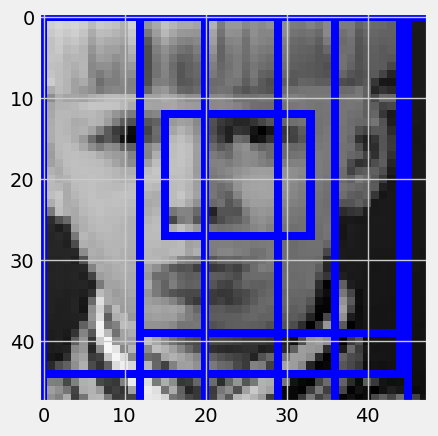

In [73]:
for box in nms_boxes_one:
    xmin,ymin,xmax,ymax = box
    cv2.rectangle(image, (xmin,ymin), (xmax, ymax), (255,0,0), 1)

for box in nms_boxes_zero:
    xmin,ymin,xmax,ymax = box
    cv2.rectangle(image, (xmin,ymin), (xmax, ymax), (0,0,255), 1)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
# 1번 클래스(파란색)만 출력을 하고 있음, 0번 클래스(빨간색)도 그려서 출력하는 코드를 위에서 추가
# 리팩토링은 고려 X

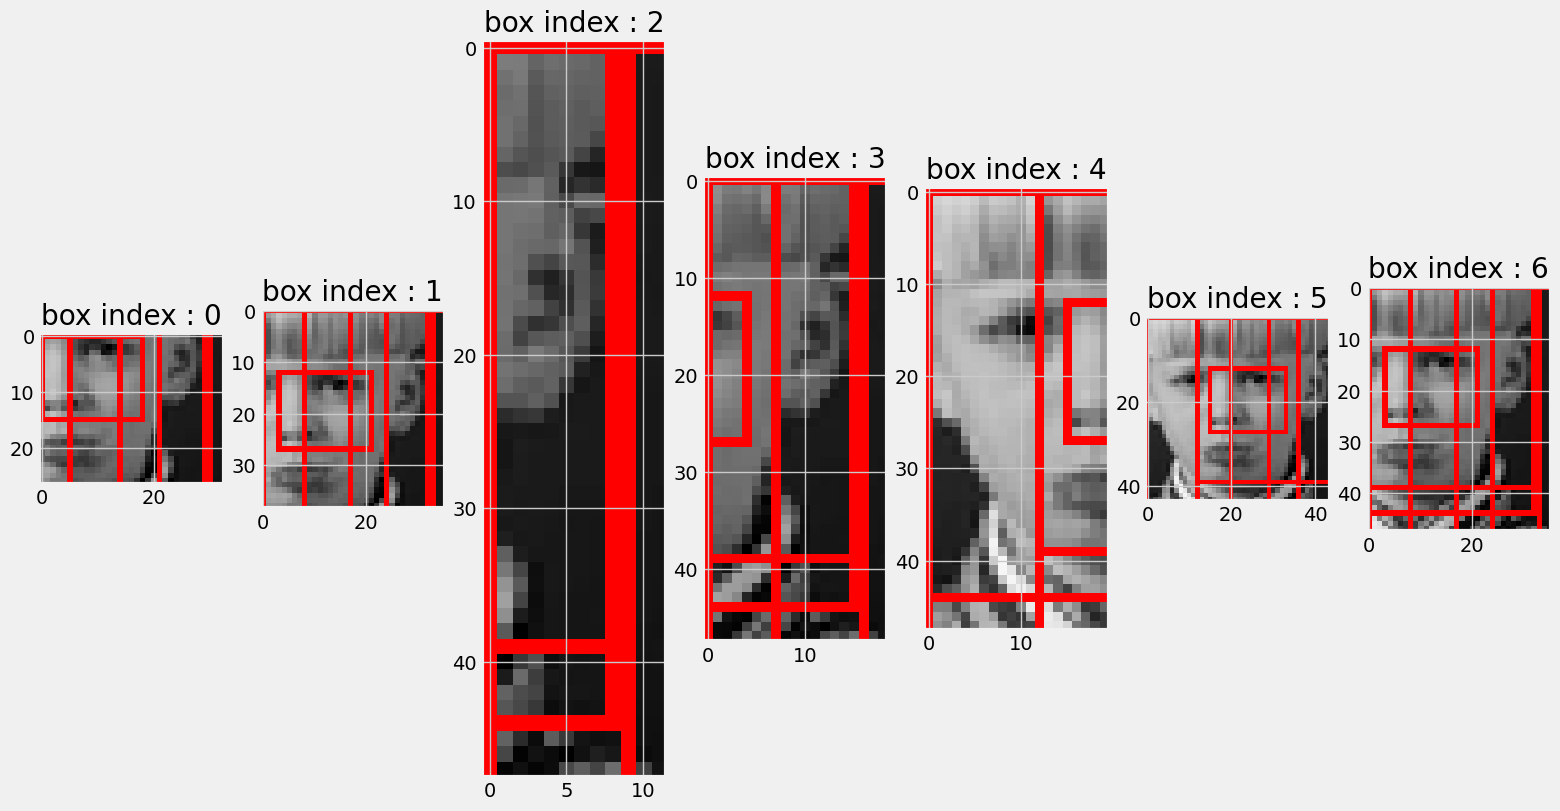

In [78]:
final_cropped_image = []
for box in nms_boxes_one:
    x,y,w,h = box
    crop = image[y:y+h, x:x+w]
    final_cropped_image.append(crop)

show_images(final_cropped_image, len(final_cropped_image))

### Fine Tuning

In [86]:
# Fine_Tuning : unfreeze freezed layers

tmp_num = int(241 * 0.7)

for layer in our_efficient_model.layers[:tmp_num]:
  layer.trainable = False
for layer in our_efficient_model.layers[tmp_num:]:
  layer.trainable = True

# our_efficient_model.summary()

#### Using Sigmoid activation

In [87]:
# Fine_Tuning : control learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
our_efficient_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_path = 'checkpoint'
mc = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss',
                                        save_best_only=True)

In [88]:
history_opt_1 = our_efficient_model.fit(train_generator, validation_data=validation_generator,
                        epochs=50,
                        callbacks = [mc, es],
                        verbose=1)

Epoch 1/50


2024-02-15 17:57:58.725696: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


281/281 [==============================] - ETA: 0s - loss: 0.6466 - accuracy: 0.6428INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


281/281 [==============================] - 49s 132ms/step - loss: 0.6466 - accuracy: 0.6428 - val_loss: 0.6557 - val_accuracy: 0.6450
Epoch 2/50
280/281 [============================>.] - ETA: 0s - loss: 0.6042 - accuracy: 0.6751INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


281/281 [==============================] - 35s 126ms/step - loss: 0.6041 - accuracy: 0.6753 - val_loss: 0.5667 - val_accuracy: 0.6731
Epoch 3/50
281/281 [==============================] - 16s 56ms/step - loss: 0.5834 - accuracy: 0.6892 - val_loss: 0.6634 - val_accuracy: 0.5593
Epoch 4/50
281/281 [==============================] - 16s 56ms/step - loss: 0.5749 - accuracy: 0.6944 - val_loss: 0.5863 - val_accuracy: 0.6664
Epoch 5/50
280/281 [============================>.] - ETA: 0s - loss: 0.5601 - accuracy: 0.7055INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


281/281 [==============================] - 36s 128ms/step - loss: 0.5600 - accuracy: 0.7056 - val_loss: 0.5072 - val_accuracy: 0.7609
Epoch 6/50
281/281 [==============================] - 16s 56ms/step - loss: 0.5548 - accuracy: 0.7026 - val_loss: 0.5378 - val_accuracy: 0.7181
Epoch 7/50
281/281 [==============================] - 16s 56ms/step - loss: 0.5301 - accuracy: 0.7231 - val_loss: 0.6682 - val_accuracy: 0.6182
Epoch 8/50
281/281 [==============================] - 16s 56ms/step - loss: 0.5204 - accuracy: 0.7303 - val_loss: 0.5127 - val_accuracy: 0.7489
Epoch 9/50
281/281 [==============================] - ETA: 0s - loss: 0.5063 - accuracy: 0.7388INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


281/281 [==============================] - 35s 126ms/step - loss: 0.5063 - accuracy: 0.7388 - val_loss: 0.4820 - val_accuracy: 0.7739
Epoch 10/50
281/281 [==============================] - 16s 56ms/step - loss: 0.4969 - accuracy: 0.7431 - val_loss: 0.5014 - val_accuracy: 0.7748
Epoch 11/50
281/281 [==============================] - 16s 56ms/step - loss: 0.4782 - accuracy: 0.7598 - val_loss: 0.5366 - val_accuracy: 0.6744
Epoch 12/50
281/281 [==============================] - ETA: 0s - loss: 0.4765 - accuracy: 0.7584INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


281/281 [==============================] - 36s 128ms/step - loss: 0.4765 - accuracy: 0.7584 - val_loss: 0.4508 - val_accuracy: 0.7899
Epoch 13/50
281/281 [==============================] - ETA: 0s - loss: 0.4621 - accuracy: 0.7686INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


281/281 [==============================] - 36s 129ms/step - loss: 0.4621 - accuracy: 0.7686 - val_loss: 0.4378 - val_accuracy: 0.7939
Epoch 14/50
281/281 [==============================] - ETA: 0s - loss: 0.4503 - accuracy: 0.7745INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


281/281 [==============================] - 36s 127ms/step - loss: 0.4503 - accuracy: 0.7745 - val_loss: 0.4265 - val_accuracy: 0.8033
Epoch 15/50
281/281 [==============================] - 16s 56ms/step - loss: 0.4398 - accuracy: 0.7843 - val_loss: 0.5801 - val_accuracy: 0.7070
Epoch 16/50
281/281 [==============================] - 16s 56ms/step - loss: 0.4407 - accuracy: 0.7813 - val_loss: 0.4691 - val_accuracy: 0.7574
Epoch 17/50
281/281 [==============================] - 16s 56ms/step - loss: 0.4294 - accuracy: 0.7907 - val_loss: 0.4704 - val_accuracy: 0.7663
Epoch 18/50
281/281 [==============================] - 16s 56ms/step - loss: 0.4143 - accuracy: 0.7984 - val_loss: 0.4331 - val_accuracy: 0.7921
Epoch 19/50
281/281 [==============================] - 16s 56ms/step - loss: 0.4123 - accuracy: 0.7986 - val_loss: 0.4508 - val_accuracy: 0.7877
Epoch 20/50
281/281 [==============================] - 16s 56ms/step - loss: 0.4120 - accuracy: 0.8031 - val_loss: 0.5253 - val_accuracy: 0.7

INFO:tensorflow:Assets written to: checkpoint/assets


281/281 [==============================] - 36s 130ms/step - loss: 0.4074 - accuracy: 0.7975 - val_loss: 0.3934 - val_accuracy: 0.8118
Epoch 22/50
281/281 [==============================] - 16s 56ms/step - loss: 0.3859 - accuracy: 0.8178 - val_loss: 0.5090 - val_accuracy: 0.7716
Epoch 23/50
281/281 [==============================] - 16s 56ms/step - loss: 0.3859 - accuracy: 0.8153 - val_loss: 0.4210 - val_accuracy: 0.8087
Epoch 24/50
281/281 [==============================] - 16s 56ms/step - loss: 0.3776 - accuracy: 0.8229 - val_loss: 0.4457 - val_accuracy: 0.8042
Epoch 25/50
281/281 [==============================] - 16s 56ms/step - loss: 0.3759 - accuracy: 0.8158 - val_loss: 0.4921 - val_accuracy: 0.7516
Epoch 26/50
281/281 [==============================] - ETA: 0s - loss: 0.3726 - accuracy: 0.8197INFO:tensorflow:Assets written to: checkpoint/assets


INFO:tensorflow:Assets written to: checkpoint/assets


281/281 [==============================] - 36s 128ms/step - loss: 0.3726 - accuracy: 0.8197 - val_loss: 0.3899 - val_accuracy: 0.8140
Epoch 27/50
281/281 [==============================] - 16s 56ms/step - loss: 0.3589 - accuracy: 0.8317 - val_loss: 0.5400 - val_accuracy: 0.7520
Epoch 28/50
281/281 [==============================] - 16s 56ms/step - loss: 0.3601 - accuracy: 0.8281 - val_loss: 0.4754 - val_accuracy: 0.7774
Epoch 29/50
281/281 [==============================] - 16s 56ms/step - loss: 0.3459 - accuracy: 0.8374 - val_loss: 0.3941 - val_accuracy: 0.8122
Epoch 30/50
281/281 [==============================] - 16s 56ms/step - loss: 0.3305 - accuracy: 0.8448 - val_loss: 0.3940 - val_accuracy: 0.8189
Epoch 31/50
281/281 [==============================] - 16s 56ms/step - loss: 0.3394 - accuracy: 0.8414 - val_loss: 0.4077 - val_accuracy: 0.8207
Epoch 32/50
281/281 [==============================] - 16s 56ms/step - loss: 0.3348 - accuracy: 0.8413 - val_loss: 0.5474 - val_accuracy: 0.7

In [89]:
# Fine_Tuning : unfreeze freezed layers

for layer in our_efficient_model_t.layers[:tmp_num]:
  layer.trainable = False
for layer in our_efficient_model_t.layers[tmp_num:]:
  layer.trainable = True

# our_efficient_model.summary()

In [90]:
# Fine_Tuning : control learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
our_efficient_model_t.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_path = 'checkpoint_t'
mc = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss',
                                        save_best_only=True)

In [91]:
history_opt_2 = our_efficient_model.fit(train_generator, validation_data=validation_generator,
                        epochs=50,
                        callbacks = [mc, es],
                        verbose=1)

Epoch 1/50
280/281 [============================>.] - ETA: 0s - loss: 0.3139 - accuracy: 0.8536INFO:tensorflow:Assets written to: checkpoint_t/assets


INFO:tensorflow:Assets written to: checkpoint_t/assets


281/281 [==============================] - 37s 130ms/step - loss: 0.3135 - accuracy: 0.8538 - val_loss: 0.4062 - val_accuracy: 0.8042
Epoch 2/50
280/281 [============================>.] - ETA: 0s - loss: 0.3075 - accuracy: 0.8568INFO:tensorflow:Assets written to: checkpoint_t/assets


INFO:tensorflow:Assets written to: checkpoint_t/assets


281/281 [==============================] - 36s 129ms/step - loss: 0.3078 - accuracy: 0.8566 - val_loss: 0.3789 - val_accuracy: 0.8243
Epoch 3/50
281/281 [==============================] - 16s 56ms/step - loss: 0.3037 - accuracy: 0.8597 - val_loss: 0.4058 - val_accuracy: 0.8207
Epoch 4/50
281/281 [==============================] - 16s 56ms/step - loss: 0.2944 - accuracy: 0.8653 - val_loss: 0.4048 - val_accuracy: 0.8256
Epoch 5/50
281/281 [==============================] - 16s 56ms/step - loss: 0.2893 - accuracy: 0.8695 - val_loss: 0.3953 - val_accuracy: 0.8292
Epoch 6/50
280/281 [============================>.] - ETA: 0s - loss: 0.2777 - accuracy: 0.8747INFO:tensorflow:Assets written to: checkpoint_t/assets


INFO:tensorflow:Assets written to: checkpoint_t/assets


281/281 [==============================] - 36s 128ms/step - loss: 0.2784 - accuracy: 0.8742 - val_loss: 0.3784 - val_accuracy: 0.8345
Epoch 7/50
281/281 [==============================] - 16s 56ms/step - loss: 0.2710 - accuracy: 0.8764 - val_loss: 0.4135 - val_accuracy: 0.8216
Epoch 8/50
281/281 [==============================] - 16s 56ms/step - loss: 0.2693 - accuracy: 0.8804 - val_loss: 0.3843 - val_accuracy: 0.8207
Epoch 9/50
281/281 [==============================] - 16s 56ms/step - loss: 0.2654 - accuracy: 0.8799 - val_loss: 0.4143 - val_accuracy: 0.8104
Epoch 10/50
281/281 [==============================] - 16s 56ms/step - loss: 0.2594 - accuracy: 0.8825 - val_loss: 0.4171 - val_accuracy: 0.8260
Epoch 11/50
281/281 [==============================] - 16s 56ms/step - loss: 0.2505 - accuracy: 0.8886 - val_loss: 0.4103 - val_accuracy: 0.8194
Epoch 12/50
281/281 [==============================] - 16s 56ms/step - loss: 0.2477 - accuracy: 0.8860 - val_loss: 0.4388 - val_accuracy: 0.8194

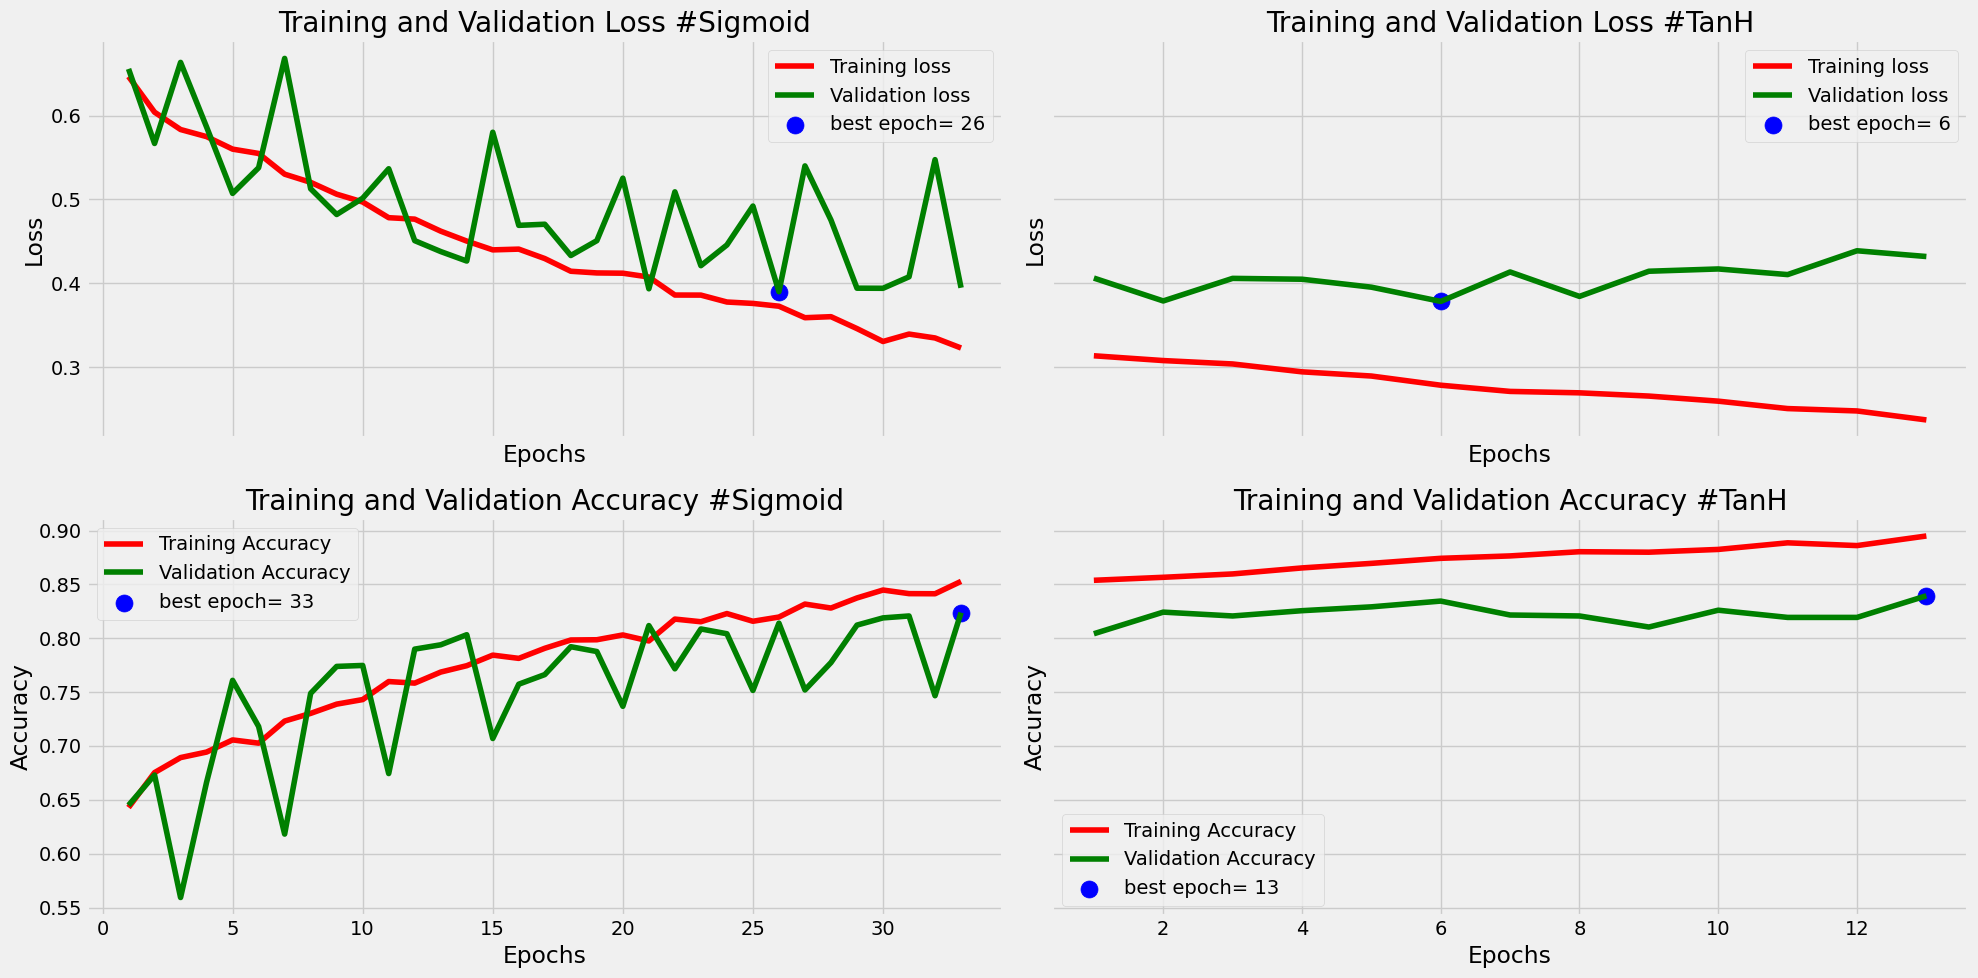

In [94]:
# Sigmoid
train_acc_opt_1 = history_opt_1.history['accuracy']
train_loss_opt_1 = history_opt_1.history['loss']
valid_acc_opt_1 = history_opt_1.history['val_accuracy']
valid_loss_opt_1 = history_opt_1.history['val_loss']
# TanH
train_acc_opt_2 = history_opt_2.history['accuracy']
train_loss_opt_2 = history_opt_2.history['loss']
valid_acc_opt_2 = history_opt_2.history['val_accuracy']
valid_loss_opt_2 = history_opt_2.history['val_loss']

# loss 최저점과 acc 최고점 좌표 확인 목적
# Sigmoid
index_loss_opt_1 = np.argmin(valid_loss_opt_1)
val_lowest_opt_1 = valid_loss_opt_1[index_loss_opt_1]
index_acc_opt_1 = np.argmax(valid_acc_opt_1)
acc_highest_opt_1 = valid_acc_opt_1[index_acc_opt_1]
# TanH
index_loss_opt_2 = np.argmin(valid_loss_opt_2)
val_lowest_opt_2 = valid_loss_opt_2[index_loss_opt_2]
index_acc_opt_2 = np.argmax(valid_acc_opt_2)
acc_highest_opt_2 = valid_acc_opt_2[index_acc_opt_2]

# Epochs을 그래프 상에서 표현하기 위함
# Sigmoid
Epochs_opt_1 = [i+1 for i in range(len(train_acc_opt_1))]
loss_label_opt_1 = f'best epoch= {str(index_loss_opt_1 + 1)}'
acc_label_opt_1 = f'best epoch= {str(index_acc_opt_1 + 1)}'
# TanH
Epochs_opt_2 = [i+1 for i in range(len(train_acc_opt_2))]
loss_label_opt_2 = f'best epoch= {str(index_loss_opt_2 + 1)}'
acc_label_opt_2 = f'best epoch= {str(index_acc_opt_2 + 1)}'

# Plot
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(20, 10))
### Sigmoid
axs[0, 0].plot(Epochs_opt_1, train_loss_opt_1, 'r', label= 'Training loss')
axs[0, 0].plot(Epochs_opt_1, valid_loss_opt_1, 'g', label= 'Validation loss')
axs[0, 0].scatter(index_loss_opt_1 + 1, val_lowest_opt_1, s= 150, c= 'blue', label= loss_label_opt_1)
axs[0, 0].set_title('Training and Validation Loss #Sigmoid')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

axs[1, 0].plot(Epochs_opt_1, train_acc_opt_1, 'r', label= 'Training Accuracy')
axs[1, 0].plot(Epochs_opt_1, valid_acc_opt_1, 'g', label= 'Validation Accuracy')
axs[1, 0].scatter(index_acc_opt_1 + 1 , acc_highest_opt_1, s= 150, c= 'blue', label= acc_label_opt_1)
axs[1, 0].set_title('Training and Validation Accuracy #Sigmoid')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

## TanH
axs[0, 1].plot(Epochs_opt_2, train_loss_opt_2, 'r', label= 'Training loss')
axs[0, 1].plot(Epochs_opt_2, valid_loss_opt_2, 'g', label= 'Validation loss')
axs[0, 1].scatter(index_loss_opt_2 + 1, val_lowest_opt_2, s= 150, c= 'blue', label= loss_label_opt_2)
axs[0, 1].set_title('Training and Validation Loss #TanH')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

axs[1, 1].plot(Epochs_opt_2, train_acc_opt_2, 'r', label= 'Training Accuracy')
axs[1, 1].plot(Epochs_opt_2, valid_acc_opt_2, 'g', label= 'Validation Accuracy')
axs[1, 1].scatter(index_acc_opt_2 + 1 , acc_highest_opt_2, s= 150, c= 'blue', label= acc_label_opt_2)
axs[1, 1].set_title('Training and Validation Accuracy #TanH')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()
plt.tight_layout()
plt.show()

In [35]:
our_efficient_model.load_weights('checkpoint')

2024-02-15 07:29:49.080155: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open checkpoint: FAILED_PRECONDITION: checkpoint; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


### Detection

In [36]:
## detection 진행
image = cv2.imread(path_img)
cropped_image = []

# ss 제안 받은 영역 crop
for box in ssresults:
    x,y,w,h = box
    crop = image[ y:y+h , x:x+w]
    cropped_image.append(crop)

# crop한 영역을 전처리
preprocessed_image = []
for img in cropped_image:
    resized_image = cv2.resize(img, (224,224) , interpolation=cv2.INTER_AREA)
    normalized_image = resized_image / 255.0
    preprocessed_image.append(normalized_image)

import numpy as np
preprocessed_image = np.array(preprocessed_image)

In [37]:
scores = our_efficient_model.predict(preprocessed_image)
# 1. 0.5 이상 이면 1, 0.5미만이면 0클래스로
# 2. 각각 클래스에 대한 좌표값과 예측결과 값을 같이
# 3. 0번 클래스는 [preprocessed_image[0] 좌표 값(x,y,w,h) , 1 - 0.2]
# 4. 1번 클래스는 [preprocessed_image[1] 좌표 값(x,y,w,h), 0.99]

1/1 [==============================] - 1s 1s/step


In [51]:
print(scores)

[[0.7921799 ]
 [0.862273  ]
 [0.6964117 ]
 [0.7458095 ]
 [0.6822072 ]
 [0.6305166 ]
 [0.5842706 ]
 [0.8193289 ]
 [0.70253843]
 [0.8641183 ]
 [0.65349877]
 [0.7007595 ]
 [0.70775795]
 [0.6659434 ]
 [0.69451433]
 [0.7508813 ]
 [0.7417936 ]
 [0.7462669 ]
 [0.6904823 ]]


In [50]:
one_class = []
zero_class = []
threshold = 0.7
for idx,score in enumerate(scores):
    if score[0] > 0.5:
        x,y,w,h = ssresults[idx]
        if score[0] > threshold:
            one_class.append([x,y,w,h,score[0]])
    else:
        x,y,w,h = ssresults[idx]
        if 1-score[0] > threshold:
            zero_class.append([x,y,w,h,1-score[0]])
one_class, zero_class

([[13, 0, 35, 48, 0.7921799],
  [11, 6, 25, 19, 0.862273],
  [11, 21, 28, 27, 0.7458095],
  [11, 0, 37, 48, 0.8193289],
  [11, 6, 20, 14, 0.70253843],
  [0, 0, 48, 48, 0.8641183],
  [12, 19, 27, 29, 0.7007595],
  [12, 22, 27, 26, 0.70775795],
  [11, 6, 28, 42, 0.7508813],
  [27, 19, 19, 29, 0.7417936],
  [11, 6, 35, 42, 0.7462669]],
 [])

In [43]:
bbox = []
scores_list = []
for box in one_class:
    x,y,w,h = box[:-1]
    bbox.append([x,y,x+w,y+h])
    scores_list.append(box[-1])

nms_idices_one = cv2.dnn.NMSBoxes(bbox, scores_list ,
                       score_threshold=0.9, nms_threshold=0.01)

nms_boxes_one = [bbox[i] for i in nms_idices_one]
nms_scores_one = [scores_list[i] for i in nms_idices_one]


bbox = []
scores_list = []
for box in zero_class:
    x,y,w,h = box[:-1]
    bbox.append([x,y,x+w,y+h])
    scores_list.append(box[-1])

nms_idices_zero = cv2.dnn.NMSBoxes(bbox, scores_list ,
                       score_threshold=0.7, nms_threshold=0.5)

nms_boxes_zero = [bbox[i] for i in nms_idices_zero]
nms_scores_zero = [scores_list[i] for i in nms_idices_zero]

#nms threshold = BBOX간 겹침의 허용 정도 (0.3~0.5)
#score threshold = BBOX의 prediction 허용 정도(이 수치값을 넘어야 객체로 인정)


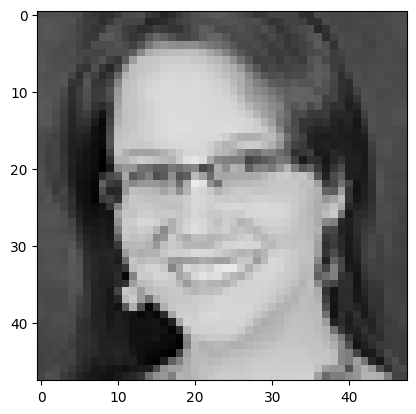

In [41]:
for box in nms_boxes_one:
    xmin,ymin,xmax,ymax = box
    cv2.rectangle(image, (xmin,ymin), (xmax, ymax), (255,0,0), 1)

for box in nms_boxes_zero:
    xmin,ymin,xmax,ymax = box
    cv2.rectangle(image, (xmin,ymin), (xmax, ymax), (0,0,255), 1)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
# 1번 클래스(파란색)만 출력을 하고 있음, 0번 클래스(빨간색)도 그려서 출력하는 코드를 위에서 추가
# 리팩토링은 고려 X